# 차원의 저주?
---

- `차원이 증가`함에 따라 `필요한 데이터 양과 시간 복잡도가 기하급수적으로 증가`하는 문제
- 차원 = 특징의 수

![image](https://user-images.githubusercontent.com/74717033/134632028-b529ff4a-80c9-4f74-b936-af301e0e4601.png)

---
- 분류 문제를 해결하고자 한다고 가정. 이때, 샘플은 총 9개, 특징은 x1, x2, x3로 총 3가지가 있다. 고 가정<br>
- 특징을 x1 1개로만 볼때 1번 위치에 새로운 샘플이 입력되면, 해당 위치에 세모가 가장 많으므로 세모라 판단할 가능성이 크다.<br>
- 특징을 x1, x2 2개로 할때 2번 위치에 새로운 샘플이 입력되면, 해당 위치에 세모값이 가장 많으므로 세모라 판단할 가능성이 크다.<br>
- 특징을 x1, x2, x3 3개로 할때 3번 위치에 새로운 샘플이 입력되면, 빈공간이기 때문에 판단할 근거가 없다.<br><br>
- 즉, 차원이 증가함에 따라 각 공간에 들어갈 샘플이 적어지게 된다(정확도 하락). 
- 정확도를 높이기 위해서는 `더 많은 샘플` 이 필요하게 되고, 이를 위해 추가 데이터 수집이 필요하다.
---
- 결국, 어떤 새로운 샘플값을 일반화하여 결정하기 위한 `근거가 되는 데이터가 부족하다` -> `과적합 발생` -> `모델 성능 저하`


- 위의 그림은 label이 범주형이지만, 연속형의 경우 그 정도는 더 심해질 것이다.(특징의 수뿐만아니라 종류도 중요한 판단요소)
---

# 왜 차원을 줄여야 하는가?
---

- `차원이 증가`함에 따라 `모델 학습 시간이 정비례하게 증가`한다.
- 차원이 증가하면 각 `결정 공간에 포함되는 샘플 수가 적어져`, **과적합**으로 이어지고, 이는 `모델의 성능저하`로 이어진다.

![image](https://user-images.githubusercontent.com/74717033/134632156-27531da0-e002-4e81-a0a1-dbad1dc9e042.png)

---
- 일반적으로 특징이 증가할수록 모델의 성능이 증가하다가, 특정 개수 이상부터는 성능이 하락한다.(과적합 구간)<br>
- 특징이 너무 적으면 되려 과소적합 발생<br>
- 모델성능은 평가데이터에 대한 성능을 의미<br>

# 차원의 저주 해결 방법 
---
- 분류 및 예측에 효과적인 특징만을 선택해 차원을 축소하는 것


![image](https://user-images.githubusercontent.com/74717033/134632195-5ba8abc2-85e1-4f9b-a99d-2d85612caba7.png)

---

## 적용대상
---
- 특징선택은 특징이 많은 데이터에만 적용되지 않는다.
- 각 특징의 개수 대비 성능을 보고 특징 개수를 선택해야 한다.
- 특징이 적더라도 특징 선택을 했을때 결과가 더 좋아지는 경우도 있기 때문이다.
---

In [1]:
import os
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

In [2]:
df = pd.read_csv("appendicitis.csv")

df.head()

,At1,At2,At3,At4,At5,At6,At7,Class
0,0.213,0.554,0.207,0.000,0.000,0.749,0.220,1
1,0.458,0.714,0.468,0.111,0.102,0.741,0.436,1
2,0.102,0.518,0.111,0.056,0.022,0.506,0.086,1
3,0.187,0.196,0.105,0.056,0.029,0.133,0.085,1
4,0.236,0.804,0.289,0.111,0.066,0.756,0.241,1


In [3]:
# 특징과 라벨 분리
X = df.drop('Class', axis = 1)
Y = df['Class']

In [4]:
# 학습 데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

특징에 따른 SVM 모델 테스트 함수 작성

In [5]:
# 특징에 따른 SVM 모델 테스트 함수 작성
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# 특징 개수별 차이를 실험하기위한 함수 생성
def feature_test(Train_X, Test_X, Train_Y, Test_Y, features):
    s_Train_X = Train_X[features]
    s_Test_X = Test_X[features]
    
    # 모델 인스턴스 & fitting
    model = SVC().fit(s_Train_X, Train_Y)
    
    # 예측
    pred_Y = model.predict(s_Test_X)    
    
    # 평가
    return f1_score(Test_Y, pred_Y)

모든 특징을 썼을때의 점수 계산

In [6]:
# 비교대상 (모든 특징을 썼을 때의 점수 )
base_score = feature_test(Train_X, Test_X, Train_Y, Test_Y, Train_X.columns) 
print(base_score)

0.25


함수를 활용해 각 특징 개수별 모델 평가지표 출력

In [7]:
import itertools # 조합만들기용

# 특징 list 
f_list = list(range(1, len(Train_X.columns)))
outperform_ratio_list = []
best_score = 0

# 총 2^7개 만큼의 조합 가능
for f in range(1, len(Train_X.columns)): # f = 선택한 특징 개수
    print('현재 조합중인 특성의 개수는', f ,'개입니다.')
    f_num = 0 # 특징을 f개 뽑았을 때, 원본보다 성능이 좋은 경우
    f_dem = 0 # 특징을 f개 뽑는 경우의 수
    
    # Train_X의 컬럼값을 기준으로 f개의 특징을 고르는 모든 경우의 수 조합
    for features in itertools.combinations(Train_X.columns, f):
        # itertools은 tuple 형태이므로 값을 반환한뒤 형변환을 해준다
        score = feature_test(Train_X, Test_X, Train_Y, Test_Y, list(features))
        
        # 조합별로 계산한 socre가 현재 best score보다 크면 feature list에 조합을 저장
        # + best_score & best_feature update
        if score > best_score:
            best_score = score
            best_feature = list(features)
        
        # 조합별로 계산한 socre가 현재 best score보다 크면
        # 특징을 f개 뽑았을 때, 원본보다 성능이 좋은 경우의 값 +1
        # 특징을 f개 뽑는 경우의 수는 조건 상관없이 무조건 f값이 1늘어날때마다 동시에 1씩 증가
        if score > base_score:
            f_num += 1 
        f_dem += 1
    
    # 각 f값 별로 이전의 best score보다 좋은 것의 비율
    outperform_ratio_list.append(f_num / f_dem)

현재 조합중인 특성의 개수는 1 개입니다.
현재 조합중인 특성의 개수는 2 개입니다.
현재 조합중인 특성의 개수는 3 개입니다.
현재 조합중인 특성의 개수는 4 개입니다.
현재 조합중인 특성의 개수는 5 개입니다.
현재 조합중인 특성의 개수는 6 개입니다.


<BarContainer object of 6 artists>

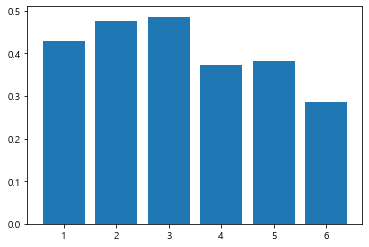

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.bar(f_list, outperform_ratio_list)

In [9]:
best_feature, best_score

(['At1', 'At4'], 0.6666666666666666)

- 특징이 7개 밖에 되지 않아도, 특징 선택을 통해 모델 성능 개선이 가능하다.

# 주먹 구구식 특징 선택의 문제점
---

- 위와 같은 방법은 `선택 가능한 모든 특징 집합을 비교 & 평가한뒤 가장 좋은 특징 집합을 선택` 하는 방법이다.<br><br>
- 문제는 이러한 주먹구구식 방식은 특징의 수가 늘어날 수록 많은 비용이 발생한다는 것 이다.<br>
    - 계산 시간 증가, 컴퓨터 메모리 문제 등<br><br>
- 실제로 특징 개수가 n개라고 가면 이에 대해 `2의 n제곱 -1 번` 만큼의 모형 학습이 필요하여 현실적으로 한계가 있다.<br><br>
    - 실제 1초에 1억번의 모형을 학습할 수 있는 슈퍼컴퓨터로, 1000개의 특징에 대해 위와 같은 방법을 적용시키면 best_feature와 best_score를 찾는데 소요되는 시간은 **400조년** 이라 한다.

# 필터링 기반의 특징 선택
---
- 주먹 구구식 특징 선택의 문제점을 해결한 특징 선택법
- 특징과 라벨이 얼마나 관련이 있는지를 나타내는 통계량으로 `클래스 관련성이 높은 특징` 을 찾아 우선적으로 선택하는 방법

![image](https://user-images.githubusercontent.com/74717033/134632218-19f425b2-3adb-46ad-83bc-cb62a0716ef3.png)

---

## 클래스 관련성(Class relevance)
---

- `하나의 특징이 클래스를 얼마나 잘 설명하는지를 나타내는 척도`
- 상관계수, 카이제곱 통계량, 상호정보량 등 특징과 라벨간 독립성(= 서로 얼마나 독립적이지 않은지)을 타나내는 통계량 지표를 통해 측정할 수 있다.
- 클래스 관련성이 높은 특징은 결국 모델의 분류 및 예측에 도움이 되는 특징이며, 클래스 관련성이 낮은 특징은 도움이 되지 않는 특징이라 판별하는 것이다.
---

- 특징과 라벨이 모두 범주형인 예시 (즉 분류 문제)


![image](https://user-images.githubusercontent.com/74717033/134632227-a7493d03-e19e-43b7-82ca-85574b3a5adf.png)

---

## 클래스 관련성 척도 예시 : F-통계량
---

- ANOVA에서 사용하는 통계량, `집단 간 평균 차이가 있는지 측정`하기위한 통계량

![image](https://user-images.githubusercontent.com/74717033/134632245-fddf2bde-efd6-467e-b119-b6119cf78d4e.png)
`($x$는 입력, $y$는 출력)`


- x가 높은 F-통계량을 가질 때(좌측그림) : x1이 크면 A일 가능성이 높아지고, x1이 작으면 B일 가능성이 높아진다. (분류가 가능)

- x가 낮은 F-통계량을 가질 때(우측 그림) : 클래스별로 x2값의 분포가 비슷하기 때문에 분류하기가 어렵다.

- 이럴때 x1의 특징이 x2보다 더 좋은 특징이다 라고 판단한다.

## 클래스 관련 척도 분류 표
---

![image](https://user-images.githubusercontent.com/74717033/134632267-1334b3fd-e4af-42c1-a45a-6eb4eb456d85.png)

---
- 클래스 관련성 척도는 특징과 라벨의 유형에 따라 선택해야 한다.<br>
- 통계량의 수학적 이해를 하면 더 좋지만, 기본적으론 각 통계량이 의미하는 바를 이해 하는 게 우선이다.<br>
    - 1) 위의 통계량들은 특징과 라벨이 서로 얼마나 독립적이지 않은지를 나타낸다.<br>
    - 2) 또한, 얼마나 클래스와 관련이 있는지를 측정하는 지표이다.<br>
    - 3) 그리고 특징 유형과 라벨 유형에 따라 사용되는 통계량이 다르다는 점을 인지하는게중요

# 관련 함수 : sklearn.feature_selection.SelectKBest
---

**파라미터**
- scoring_func : 클래스 관련성 측정 함수 (e.g : chi2, mutual_info_classif, f_regression 등 위의 척도 분류표 참조)<br>
- k : 선택하는 특징의 개수<br>
    - 양수만 가능하다.<br>
    - 원래의 특징개수와 같거나 작아야 한다.<br>

**주요 메서드**<br>
- .fit, .transform, .fit_transform : 특징을 선택할때 사용<br>
- .get_support() : 선택된 특징의 인덱스를 return (뽑힌특징은 1 =True, 뽑히지 않은 특징은 0 = False) 인 bool type

**주요 속성** : scoring_func(X,Y) 의 결과물과 동일하다.<br>
- scores_ : scoring_func로 측정한 각 특징별 점수<br>
- pvalues_ : scoring_func 로 측정한 특징별 p-value (1에 가까울수록 독립적, 0에 가까울 수록 라벨과 관련서이 높다.)